GPU used to train the model

In [2]:
!nvidia-smi

Wed Jul 21 14:52:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Importing Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
pip install pytorch-lightning 

     |████████████████████████████████| 813 kB 4.3 MB/s 
     |████████████████████████████████| 118 kB 41.4 MB/s 
     |████████████████████████████████| 234 kB 43.0 MB/s 
     |████████████████████████████████| 10.6 MB 38.7 MB/s 
     |████████████████████████████████| 636 kB 59.2 MB/s 
     |████████████████████████████████| 829 kB 66.6 MB/s 
     |████████████████████████████████| 1.3 MB 53.0 MB/s 
     |████████████████████████████████| 142 kB 60.0 MB/s 
     |████████████████████████████████| 294 kB 54.9 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=a34d822a06b300aa971dd997100980554f34d09336c42ee0d4c9442edbdefbee
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Attempting uninstal

## Importing essential libraries

In [3]:
import torch
import torchvision
from torch.utils.data import Dataset,DataLoader,random_split
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from torchvision import models
import time
import copy
import os
from os import listdir

## Changing file name to label

The folders containing flower images has its folder name as flower's category, thus for labelling we need to change the folder name.

In [ ]:
li = []

In [ ]:
from os import listdir
import os

path = '/content/gdrive/MyDrive/Kaggle/jpeg-331x331/train'
i=0

for file in listdir(path):
  li.append(file)
  os.rename(file,str(i))
  i+=1
  print('File name {file} renamed to {i}'.format( file=file , i=i))
  

File name alpine sea holly renamed to 1
File name anthurium renamed to 2
File name artichoke renamed to 3
File name azalea renamed to 4
File name balloon flower renamed to 5
File name barberton daisy renamed to 6
File name bee balm renamed to 7
File name bird of paradise renamed to 8
File name bishop of llandaff renamed to 9
File name black-eyed susan renamed to 10
File name blackberry lily renamed to 11
File name blanket flower renamed to 12
File name bolero deep blue renamed to 13
File name bougainvillea renamed to 14
File name bromelia renamed to 15
File name buttercup renamed to 16
File name californian poppy renamed to 17
File name camellia renamed to 18
File name canna lily renamed to 19
File name canterbury bells renamed to 20
File name cape flower renamed to 21
File name carnation renamed to 22
File name cautleya spicata renamed to 23
File name clematis renamed to 24
File name colt's foot renamed to 25
File name columbine renamed to 26
File name common dandelion renamed to 27
F

In [ ]:
cd '/content/gdrive/MyDrive/Kaggle/jpeg-331x331/val'

/content/gdrive/MyDrive/Kaggle/jpeg-311x311/val


In [ ]:
path = '/content/gdrive/MyDrive/Kaggle/jpeg-331x331/val'
i=0

for file in listdir(path):
  os.rename(file,str(i))
  print('File name {file} renamed to {i}'.format( file=file , i=i))
  i+=1

File name alpine sea holly renamed to 0
File name anthurium renamed to 1
File name artichoke renamed to 2
File name azalea renamed to 3
File name balloon flower renamed to 4
File name barberton daisy renamed to 5
File name bee balm renamed to 6
File name bird of paradise renamed to 7
File name bishop of llandaff renamed to 8
File name black-eyed susan renamed to 9
File name blackberry lily renamed to 10
File name blanket flower renamed to 11
File name bolero deep blue renamed to 12
File name bougainvillea renamed to 13
File name bromelia renamed to 14
File name buttercup renamed to 15
File name californian poppy renamed to 16
File name camellia renamed to 17
File name canna lily renamed to 18
File name canterbury bells renamed to 19
File name cape flower renamed to 20
File name carnation renamed to 21
File name cautleya spicata renamed to 22
File name clematis renamed to 23
File name colt's foot renamed to 24
File name columbine renamed to 25
File name common dandelion renamed to 26
Fi

## Storing Meta-Data

In [ ]:
import pandas as pd
temp = []

for i in range(len(li)):
  temp.append([i,li[i]])

df = pd.DataFrame(temp)

In [ ]:
# Stroing MetaData
df.to_csv('/content/gdrive/MyDrive/Kaggle/jpeg-311x311/MetaData.csv' , index = False)

## Calculating mean and std of image channels

### Mean

In [ ]:
from PIL import Image
import os
import cv2
from os import listdir

file_path = '/content/gdrive/MyDrive/Kaggle/jpeg-331x331/train'
path_dir = os.listdir(file_path)

R_channel = 0
G_channel = 0
B_channel = 0

for idx in range(len(path_dir)):
  folder_name = path_dir[idx]
  folder_path = os.path.join(file_path,folder_name)
  #print(folder_path)
  for file in listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path,file))
    R_channel+= np.sum(img[:,:,0])
    G_channel+= np.sum(img[:,:,1])
    B_channel+= np.sum(img[:,:,2]) 

total = len(path_dir) *331*331
R_mean = R_channel/total
G_mean = G_channel/total
B_mean = B_channel/total  

### Std

In [ ]:
import math

file_path = '/content/gdrive/MyDrive/Kaggle/jpeg-331x331/train'
path_dir = os.listdir(file_path)

R_channel_2 = 0
G_channel_2 = 0
B_channel_2 = 0

for idx in range(len(path_dir)):
  folder_name = path_dir[idx]
  folder_path = os.path.join(file_path,folder_name)
  #print(folder_path)
  for file in listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path,file))
    R_channel_2+= np.sum((img[:,:,0]- R_mean) ** 2)
    G_channel_2+= np.sum((img[:,:,1]- G_mean) ** 2)
    B_channel_2+= np.sum((img[:,:,2]- B_mean) ** 2) 

total = len(path_dir) *331*331
R_std = math.sqrt(R_channel_2/total)
G_std = math.sqrt(G_channel_2/total)
B_std = math.sqrt(B_channel_2/total)  

In [ ]:
mean = [R_mean, G_mean, B_mean]
std = [R_std, G_std, B_std]

For further reference storing it in .csv format

In [ ]:
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/Kaggle/jpeg-331x331/mean_std.csv')

In [ ]:
df.head()

,0,1,2
0,9484.123409,12998.510506,14041.699694
1,104169.922606,142768.389957,154226.437699


In [ ]:
R_mean, G_mean, B_mean = df.iloc[0,0], df.iloc[0,1], df.iloc[0,2]
R_std, G_std, B_std = df.iloc[1,0], df.iloc[1,1], df.iloc[1,2]

Mean and Std accross 3 channels(RGB)

In [ ]:
mean, std

([9484.123409035219, 12998.51050644074, 14041.699694164052],
 [104169.92260574433, 142768.38995723243, 154226.43769902881])

## Before Normalization

(331, 331, 3)


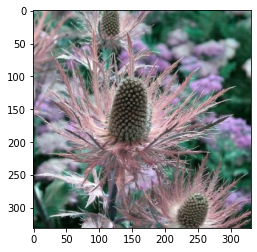

In [ ]:
plt.imshow(cv2.imread('/content/gdrive/MyDrive/Kaggle/jpeg-331x331/train/0/655.jpeg'))
print(cv2.imread('/content/gdrive/MyDrive/Kaggle/jpeg-331x331/train/0/10512.jpeg').shape)

## After Normalization

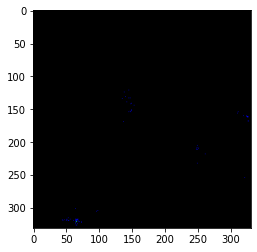

In [ ]:
temp = cv2.imread('/content/gdrive/MyDrive/Kaggle/jpeg-331x331/train/0/655.jpeg')
temp[:,:,0] = (temp[:,:,0] - R_mean)/R_std
temp[:,:,1] = (temp[:,:,1] - G_mean)/G_mean
temp[:,:,2] = (temp[:,:,2] - B_mean)/B_mean
plt.imshow(temp)

## Using MobileNet_v2 architecture

### Conversion into Pytorch dataset

In [ ]:
data_dir = '/content/gdrive/MyDrive/Kaggle/jpeg-331x331'

In [ ]:
transform = {
    'train':  transforms.Compose([
      transforms.ToTensor(),                           
      transforms.Normalize([R_mean, G_mean, B_mean] ,[R_std, G_std, B_std])
   ]),
   'val': transforms.Compose([                
      transforms.ToTensor(),                           
      transforms.Normalize([R_mean, G_mean, B_mean] ,[R_std, G_std, B_std])
   ]),
   'test': transforms.Compose([    
      transforms.Resize((331,331)),                                     
      transforms.ToTensor(),                           
      transforms.Normalize([R_mean, G_mean, B_mean] ,[R_std, G_std, B_std])
   ]),
}

In [ ]:
image_datasets = {x: torchvision.datasets.ImageFolder(os.path.join(data_dir, x),
                                          transform[x])
                  for x in ['train', 'val']}

In [ ]:
x,y = image_datasets['train'][0]
print(x.cpu().detach().numpy())
print(y)

[[[-0.09104154 -0.09104151 -0.09104146 ... -0.09104225 -0.09104229
   -0.09104232]
  [-0.09104151 -0.09104146 -0.09104146 ... -0.09104192 -0.09104195
   -0.09104203]
  [-0.09104142 -0.09104142 -0.09104135 ... -0.09104151 -0.09104162
   -0.09104165]
  ...
  [-0.09104048 -0.09103966 -0.09104297 ... -0.09104086 -0.09104086
   -0.09104086]
  [-0.09103988 -0.09104051 -0.09104358 ... -0.09104086 -0.09104086
   -0.09104086]
  [-0.09103917 -0.09104165 -0.0910441  ... -0.09104086 -0.09104086
   -0.09104086]]

 [[-0.09104249 -0.09104246 -0.09104243 ... -0.09104323 -0.0910432
   -0.09104323]
  [-0.09104246 -0.09104243 -0.09104241 ... -0.09104298 -0.091043
   -0.091043  ]
  [-0.09104238 -0.09104238 -0.09104241 ... -0.09104273 -0.09104276
   -0.09104279]
  ...
  [-0.09104279 -0.09104218 -0.0910446  ... -0.09104194 -0.09104194
   -0.09104194]
  [-0.0910423  -0.09104276 -0.09104495 ... -0.09104202 -0.09104202
   -0.09104202]
  [-0.09104174 -0.09104353 -0.09104532 ... -0.09104205 -0.09104205
   -0.091

### Defining pytorch DataLoader

In [ ]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}

### Training Method


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cuda', index=0)

In [ ]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

In [ ]:
class_names = image_datasets['train'].classes

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                print(inputs.size())
                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

### Loading the model and training

In [ ]:
model1 = models.mobilenet_v2(pretrained=True)

In [ ]:
model1.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=False),
    nn.Linear(in_features=1280, out_features=104, bias=True)
)

In [ ]:
model1 = model1.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model1.parameters(), lr=0.001)
step_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
model1 = train_model(model1, criterion, optimizer, step_lr_scheduler, num_epochs=50)

Epoch 0/49
----------
train Loss: 0.8801 Acc: 0.7801
val Loss: 10.2246 Acc: 0.0442

Epoch 1/49
----------
train Loss: 0.8155 Acc: 0.7960
val Loss: 7.1726 Acc: 0.0442

Epoch 2/49
----------
train Loss: 0.7532 Acc: 0.8137
val Loss: 9.3871 Acc: 0.0105

Epoch 3/49
----------
train Loss: 0.6946 Acc: 0.8291
val Loss: 11.7138 Acc: 0.0110

Epoch 4/49
----------
train Loss: 0.6255 Acc: 0.8462
val Loss: 7.3608 Acc: 0.0442

Epoch 5/49
----------
train Loss: 0.5750 Acc: 0.8625
val Loss: 8.7211 Acc: 0.0361

Epoch 6/49
----------
train Loss: 0.5132 Acc: 0.8782
val Loss: 7.6351 Acc: 0.0307

Epoch 7/49
----------
train Loss: 0.3777 Acc: 0.9228
val Loss: 7.7521 Acc: 0.0356

Epoch 8/49
----------
train Loss: 0.3466 Acc: 0.9312
val Loss: 9.9495 Acc: 0.0162

Epoch 9/49
----------
train Loss: 0.3279 Acc: 0.9373
val Loss: 7.8802 Acc: 0.0288

Epoch 10/49
----------
train Loss: 0.3256 Acc: 0.9370
val Loss: 7.0700 Acc: 0.1242

Epoch 11/49
----------
train Loss: 0.3092 Acc: 0.9422
val Loss: 9.9828 Acc: 0.0560



### Saving our trained model

In [ ]:
FILE = "/content/gdrive/MyDrive/Kaggle/jpeg-331x331/MobileNet_v2.pth"
torch.save(model1.state_dict(), FILE)

### Testing our model

In [ ]:
model = models.mobilenet_v2(pretrained=True)

In [ ]:
model.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=False),
    nn.Linear(in_features=1280, out_features=104, bias=True)
)

In [ ]:
model.load_state_dict(torch.load('/content/gdrive/MyDrive/Kaggle/jpeg-331x331/model_final2.pth'))

<All keys matched successfully>

In [ ]:
model.eval()

MobileNetV2(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momen

In [ ]:
from PIL import Image

image = Image.open('/content/gdrive/MyDrive/Kaggle/jpeg-331x331/download1.jpg')

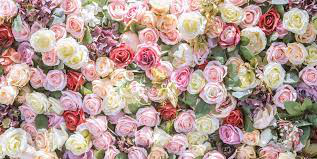

In [ ]:
image

In [ ]:
test1 = np.asarray(image)

In [ ]:
temp = transform['test'](image)

In [ ]:
temp = temp.unsqueeze(0)

In [ ]:
temp = temp.cuda()

In [ ]:
type(temp)

torch.Tensor

In [ ]:
temp.size()

torch.Size([1, 3, 331, 331])

In [ ]:
out = model(temp)

In [ ]:
torch.max(out, 1)

torch.return_types.max(values=tensor([11.6357], grad_fn=<MaxBackward0>), indices=tensor([24]))

In [ ]:
df2 = pd.read_csv('/content/gdrive/MyDrive/Kaggle/jpeg-331x331/MetaData.csv')

In [ ]:
df2.iloc[24,1]

"colt's foot"

## ResNet34

In [6]:
TRAIN_DIR = "/content/drive/MyDrive/Kaggle/jpeg-331x331/train"
VAL_DIR = "/content/drive/MyDrive/Kaggle/jpeg-331x331/val"

### Creating Training Dataset

In [7]:
transform_train = transforms.Compose([
    transforms.RandomCrop(128, padding_mode="reflect"),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])
train_ds = torchvision.datasets.ImageFolder(
    root=TRAIN_DIR,
    transform=transform_train
)

### Creating Validating Dataset

In [8]:
transform_val = transforms.Compose([
    transforms.ToTensor()
])

val_ds = torchvision.datasets.ImageFolder(
    root=VAL_DIR,
    transform=transform_val

)

In [9]:
batch_size=128

### Creating DataLoader

In [10]:
train_dl = torch.utils.data.DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = torch.utils.data.DataLoader(val_ds, batch_size, num_workers=2, pin_memory=True)

### Displaying Sample Images

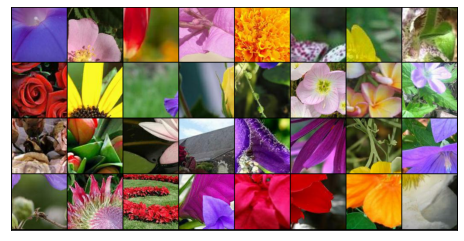

In [11]:
from torchvision.utils import make_grid

def show_batch(train_dl):
    for images,_ in train_dl:
        fig, ax = plt.subplots(figsize=(8,8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:32], nrow=8).permute(1,2,0))
        break
        
show_batch(train_dl)

### Selecting the device

In [12]:
def get_device():
    if torch.cuda.is_available():
        return torch.device("cuda") #if the GPU is availble this method will return cuda.
    else:
        return torch.device("cpu")
    
def to_device(data, device): #in here we move the data to device of our choice, the GPU
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        for x in self.dl:
            yield to_device(x, self.device)
            
    def __len__(self):
        return len(self.dl)
    
device = get_device()
device

device(type='cuda')

### Defining Model

In [13]:
def accuracy(out, labels):
    _, preds = torch.max(out, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out =self(images)
        loss = F.cross_entropy(out, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {"val_loss": loss.detach(), "val_acc": acc}
    
    def validation_epoch_end(self, outputs):
        batch_loss = [x["val_loss"] for x in outputs]
        epoch_loss = torch.stack(batch_loss).mean()
        batch_acc = [x["val_acc"] for x in outputs]
        epoch_acc = torch.stack(batch_acc).mean()
        return {"val_loss": epoch_loss.item(), "val_acc": epoch_acc.item()}
    
    def epoch_end(self, epoch, epochs, result):
        print("Epoch: [{}/{}], last_lr: {:.4f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
        epoch+1, epochs, result["lrs"][-1], result["train_loss"], result["val_loss"], result["val_acc"]))

In [14]:
class ResNet(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = models.resnet34(pretrained=True)
        number_of_features = self.network.fc.in_features
        self.network.fc = nn.Linear(number_of_features, 104)
        
    def forward(self, xb):
        return self.network(xb)
    
    def freeze(self): #by freezing all the layers but the last one we allow it to warm up (the others are already good at training)
        for param in self.network.parameters():
            param.require_grad=False
        for param in self.network.fc.parameters():
            param.require_grad=True
            
    def unfreeze(self):
        for param in self.network.parameters():
            param.require_grad=True

### Our Model Summary

In [15]:
model = ResNet()
model

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


ResNet(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runn

In [16]:
model = to_device(model, device)

In [17]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)

In [18]:
@torch.no_grad()
def evaluate(model, val_dl):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_dl]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group["lr"]
    
def fit_one_cycle(epochs, max_lr, model, train_dl, val_dl, weight_decay=0,
                 grad_clip=None, opt_func=torch.optim.Adam):
    torch.cuda.empty_cache()
    
    history = []
    opt = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    sched = torch.optim.lr_scheduler.OneCycleLR(opt, max_lr, epochs=epochs,
                                               steps_per_epoch=len(train_dl))
    
    for epoch in range(epochs):
        model.train()
        train_loss = []
        lrs = []
        for batch in tqdm(train_dl):
            loss = model.training_step(batch)
            train_loss.append(loss)
            loss.backward()
            
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
                
            opt.step()
            opt.zero_grad()
            
            lrs.append(get_lr(opt))
            sched.step()
            
        result = evaluate(model, val_dl)
        result["train_loss"] = torch.stack(train_loss).mean().item()
        result["lrs"] = lrs
        model.epoch_end(epoch, epochs, result)
        history.append(result)
    return history

In [19]:
result = evaluate(model, val_dl) #let's check the model performance before training it
result

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


{'val_acc': 0.003771551651880145, 'val_loss': 4.805685997009277}

### Training only last layers

In [20]:
model.freeze()

In [21]:
epochs = 15
max_lr = 10e-4
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [22]:
from tqdm.notebook import tqdm

history = fit_one_cycle(epochs, max_lr, model, train_dl, val_dl,
                       weight_decay=weight_decay, grad_clip=grad_clip,
                       opt_func=opt_func)


Epoch: [1/15], last_lr: 0.0002, train_loss: 3.3890, val_loss: 2.9730, val_acc: 0.4335



Epoch: [2/15], last_lr: 0.0004, train_loss: 1.7368, val_loss: 1.7702, val_acc: 0.6409



Epoch: [3/15], last_lr: 0.0008, train_loss: 1.6085, val_loss: 1.8900, val_acc: 0.5722



Epoch: [4/15], last_lr: 0.0010, train_loss: 1.6558, val_loss: 1.6961, val_acc: 0.5752



Epoch: [5/15], last_lr: 0.0010, train_loss: 1.5236, val_loss: 1.5327, val_acc: 0.6355



Epoch: [6/15], last_lr: 0.0010, train_loss: 1.3359, val_loss: 1.4722, val_acc: 0.6460



Epoch: [7/15], last_lr: 0.0009, train_loss: 1.1993, val_loss: 1.1640, val_acc: 0.7252



Epoch: [8/15], last_lr: 0.0008, train_loss: 1.1076, val_loss: 1.1842, val_acc: 0.7209



Epoch: [9/15], last_lr: 0.0006, train_loss: 0.9782, val_loss: 1.3388, val_acc: 0.6708



Epoch: [10/15], last_lr: 0.0005, train_loss: 0.8631, val_loss: 0.8493, val_acc: 0.8125



Epoch: [11/15], last_lr: 0.0003, train_loss: 0.7488, val_loss: 0.6763, val_acc: 0.8588



Epoch: [12/15], last_lr: 0.0002, train_loss: 0.6435, val_loss: 0.5588, val_acc: 0.8828



Epoch: [13/15], last_lr: 0.0001, train_loss: 0.5574, val_loss: 0.5546, val_acc: 0.8790



Epoch: [14/15], last_lr: 0.0000, train_loss: 0.5003, val_loss: 0.5273, val_acc: 0.8871



Epoch: [15/15], last_lr: 0.0000, train_loss: 0.4817, val_loss: 0.5119, val_acc: 0.8893


In [23]:
model.unfreeze()

### Training Whole Network

In [24]:
epochs = 15
max_lr = 0.0005
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [25]:
%%time

history = fit_one_cycle(epochs, max_lr, model, train_dl, val_dl,
                       weight_decay=weight_decay, grad_clip=grad_clip,
                       opt_func=opt_func)


Epoch: [1/15], last_lr: 0.0001, train_loss: 0.4914, val_loss: 0.5227, val_acc: 0.8852



Epoch: [2/15], last_lr: 0.0002, train_loss: 0.5174, val_loss: 0.5989, val_acc: 0.8648



Epoch: [3/15], last_lr: 0.0004, train_loss: 0.6479, val_loss: 0.7421, val_acc: 0.8276



Epoch: [4/15], last_lr: 0.0005, train_loss: 0.7791, val_loss: 0.8585, val_acc: 0.7958



Epoch: [5/15], last_lr: 0.0005, train_loss: 0.8559, val_loss: 0.7773, val_acc: 0.8311



Epoch: [6/15], last_lr: 0.0005, train_loss: 0.7927, val_loss: 0.8880, val_acc: 0.7907



Epoch: [7/15], last_lr: 0.0004, train_loss: 0.7355, val_loss: 0.6724, val_acc: 0.8491



Epoch: [8/15], last_lr: 0.0004, train_loss: 0.6763, val_loss: 0.7940, val_acc: 0.8192



Epoch: [9/15], last_lr: 0.0003, train_loss: 0.6001, val_loss: 0.6565, val_acc: 0.8494



Epoch: [10/15], last_lr: 0.0002, train_loss: 0.5277, val_loss: 0.5630, val_acc: 0.8720



Epoch: [11/15], last_lr: 0.0002, train_loss: 0.4574, val_loss: 0.4897, val_acc: 0.8909



Epoch: [12/15], last_lr: 0.0001, train_loss: 0.4047, val_loss: 0.4799, val_acc: 0.8895



Epoch: [13/15], last_lr: 0.0000, train_loss: 0.3586, val_loss: 0.4637, val_acc: 0.8898



Epoch: [14/15], last_lr: 0.0000, train_loss: 0.3385, val_loss: 0.4461, val_acc: 0.8963



Epoch: [15/15], last_lr: 0.0000, train_loss: 0.3316, val_loss: 0.4496, val_acc: 0.8952
CPU times: user 3min 37s, sys: 1min 20s, total: 4min 57s
Wall time: 13min 12s


### Model Performance

Text(0, 0.5, 'Loss')

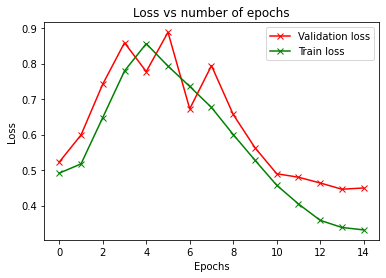

In [26]:
val_loss = [x["val_loss"] for x in history]
train_loss = [x.get("train_loss") for x in history]
plt.plot(val_loss, "-rx")
plt.plot(train_loss, "-gx")
plt.title("Loss vs number of epochs")
plt.legend(["Validation loss", "Train loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

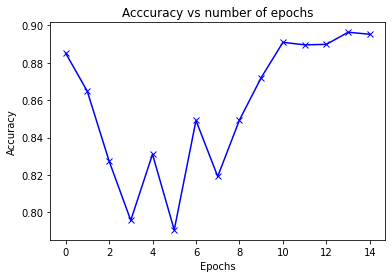

In [27]:
accuracy = [x["val_acc"] for x in history]
plt.plot(accuracy, "-bx")
plt.title("Acccuracy vs number of epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

### Saving our model

In [28]:
torch.save(model.state_dict(), '/content/drive/MyDrive/ModelFinal.pth')

### Testing ResNet Model

In [90]:
model = ResNet()

In [91]:
model.load_state_dict(torch.load('/content/drive/MyDrive/ModelFinal.pth'))

<All keys matched successfully>

In [92]:
model.eval()

ResNet(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runn

In [93]:
transform_test = transforms.Compose([
    transforms.Resize((331,331)), 
    transforms.ToTensor()
])

In [114]:
from PIL import Image

image = Image.open('/content/drive/MyDrive/Kaggle/jpeg-331x331/download4.jpg')

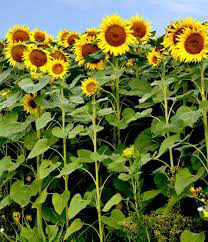

In [115]:
image

In [116]:
temp = transform_test(image)

In [117]:
temp = temp.unsqueeze(0)

In [118]:
out = model(temp)

In [119]:
_, pred = torch.max(out, 1) 

In [120]:
import pandas as pd
df2 = pd.read_csv('/content/drive/MyDrive/Kaggle/jpeg-331x331/MetaData.csv')
df2.iloc[pred,1]

86    sunflower
Name: 1, dtype: object